In [1]:
library(Seurat)
library(ggplot2)
library(Matrix)
library(DoubletFinder)
library(dplyr) # for functions

library(cowplot)
library(ggplot2)
library(dplyr)
library(EnhancedVolcano)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggrepel



In [2]:
counts <- readMM("~/data//retina/data/GSM5560840_RPE1_matrix.mtx")

In [3]:
barcodes <- read.table("~/data//retina/data/GSM5560840_RPE1_barcodes(1).tsv", stringsAsFactors=F)[,1]

In [4]:
features <- read.csv("~/data//retina/data/GSM5560840_RPE1_features(1).tsv", stringsAsFactors=F, sep="\t", header=F)

In [5]:
rownames(counts) <- make.unique(features[,2])

In [6]:
colnames(counts) <- barcodes

In [7]:
counts_per_cell <- Matrix::colSums(counts)
#cat("counts per cell: ", counts_per_cell[1:5], "\n") ## counts for first 5 cells

In [8]:
counts_per_gene <- Matrix::rowSums(counts)
#cat("counts per gene: ", counts_per_gene[1:5], "\n")  ## counts for first 5 genes

In [9]:
length(counts_per_gene)

[1] 32285

In [10]:
genes_per_cell <- Matrix::colSums(counts > 0) # count gene only if it has non-zero reads mapped.
#cat("counts for non-zero genes: ", genes_per_cell[1:5])  ## counts for first 5 genes

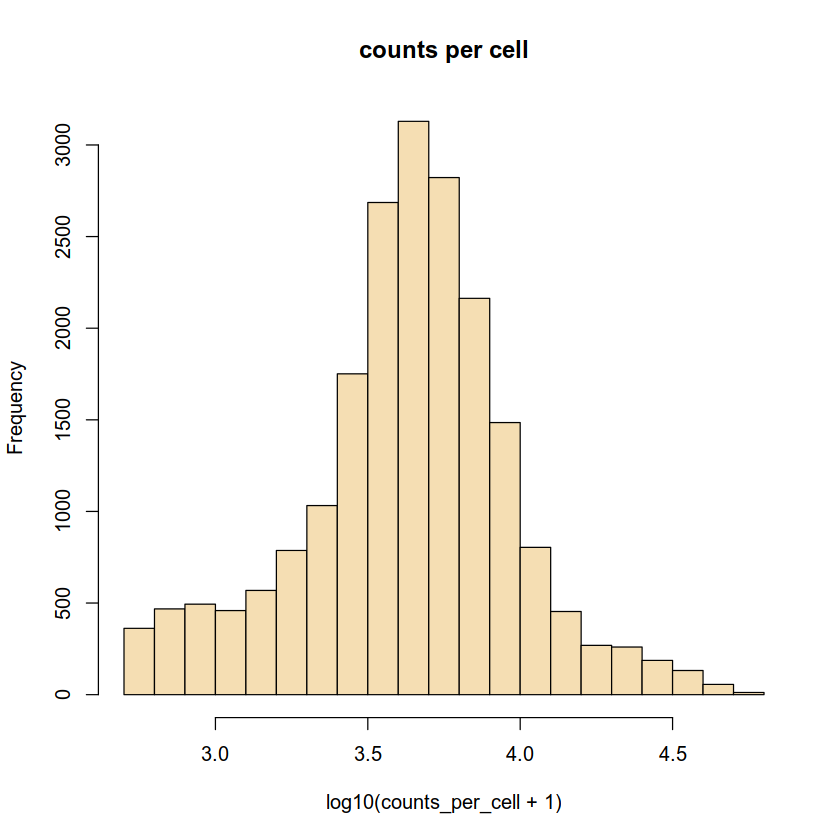

In [11]:
hist(log10(counts_per_cell+1),main='counts per cell',col='wheat')

In [12]:
seurat <- CreateSeuratObject(counts, project="RDS")

Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”


In [13]:
seurat

An object of class Seurat 
32285 features across 20381 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

In [14]:
# The [[ operator can add columns to object metadata. This is a great place to stash QC stats
seurat[["percent.mt"]] <- PercentageFeatureSet(seurat, pattern = "^mt-")

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


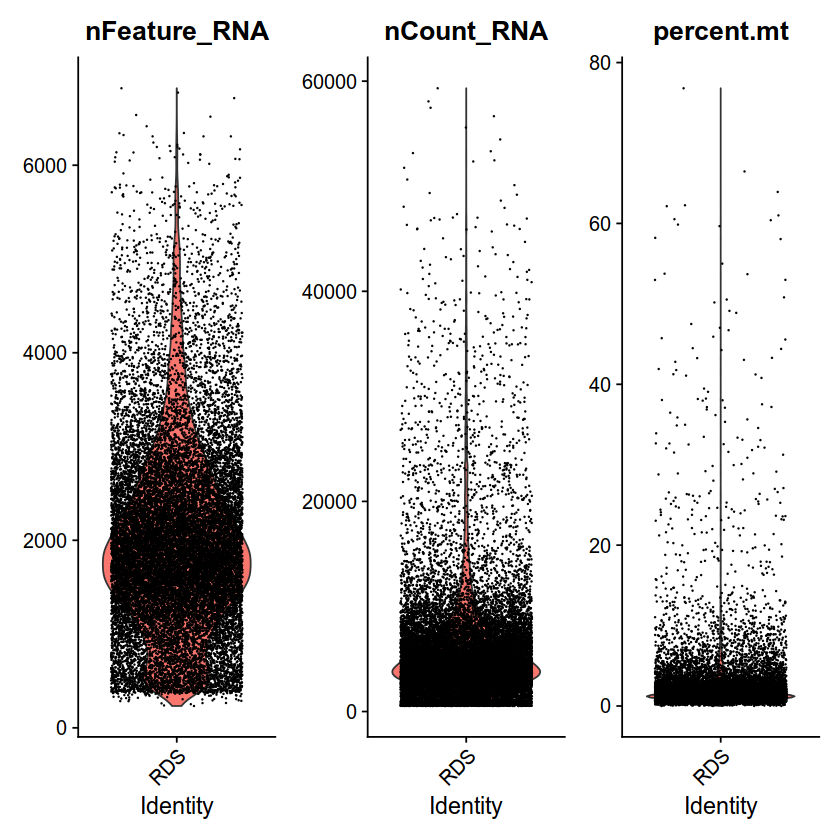

In [15]:
VlnPlot(seurat, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [16]:
seurat$log10GenesPerUMI <- log10(seurat$nFeature_RNA) / log10(seurat$nCount_RNA)

In [17]:
head(seurat@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,log10GenesPerUMI
,<fct>,<dbl>,<int>,<dbl>,<dbl>
AAACCTGAGCAAATCA-1,RDS,6767,2627,3.3397370,0.8927171
AAACCTGAGCGTTTAC-1,RDS,939,597,5.7507987,0.9338334
AAACCTGAGCTAAACA-1,RDS,5172,2091,3.4802784,0.8940924
AAACCTGAGCTCCTCT-1,RDS,4953,1953,2.4631536,0.8906142
AAACCTGAGCTTTGGT-1,RDS,9837,3203,8.7933313,0.8779558
AAACCTGAGGCATGTG-1,RDS,12923,3375,0.6500039,0.8581761


In [18]:
seurat <- subset(seurat, subset = nCount_RNA > 500 & nCount_RNA < 20000 & nFeature_RNA < 6000
                 & nFeature_RNA > 800 & percent.mt < 10 & log10GenesPerUMI >0.8)


Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


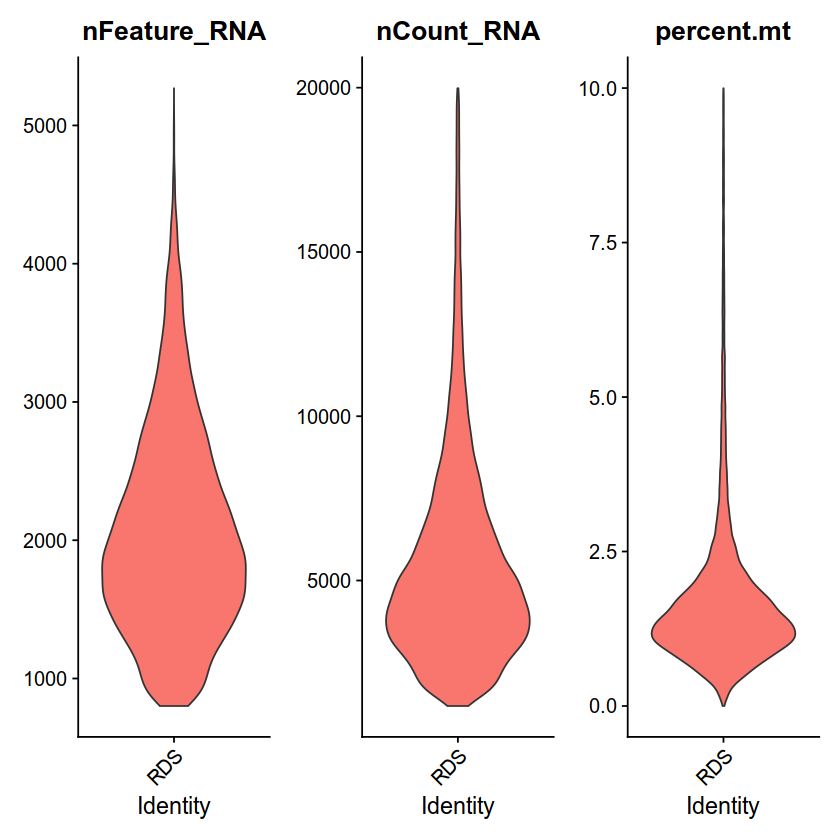

In [19]:
VlnPlot(seurat, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size=0)

In [20]:
seurat

An object of class Seurat 
32285 features across 17448 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts

In [21]:
seurat <- NormalizeData(seurat, normalization.method = "LogNormalize", scale.factor = 10000)

Normalizing layer: counts



In [22]:
saveRDS(seurat, file = "~/data//retina/notebook/h5ad/19_10_RPE_Melano_TF_Normalized.rds")
#seurat3 <- readRDS(file = "~/retina/h5ad/1_09_RPE_Melano_markers_genes_no_reclaster_Seurat.rds")

In [23]:
list_tF<-c('1700080O16Rik', '1810024B03Rik', '2010315B03Rik', '2310011J03Rik', '2610021A01Rik', '2610044O15Rik8', '3300002I08Rik', '3830417A13Rik', '5730507C01Rik', '6720489N17Rik', '9030624G23Rik', '9130019O22Rik', '9130023H24Rik', 'A1cf', 'AI987944', 'AU041133', 'AW146154', 'Abcf2', 'Abl1', 'Acaa1a', 'Acaa1b', 'Aco1', 'Adarb1', 'Adnp', 'Adnp2', 'Aebp2', 'Aff4', 'Agap2', 'Aggf1', 'Agmat', 'Ahctf1', 'Ahdc1', 'Ahr', 'Ahrr', 'Aire', 'Ak6', 'Akr1a1', 'Alx1', 'Alx3', 'Alx4', 'Anxa1', 'Anxa11', 'Apex1', 'Apex2', 'Ar', 'Arfgap1', 'Arg1', 'Arg2', 'Arid3a', 'Arid3b', 'Arid3c', 'Arid5a', 'Arid5b', 'Arnt', 'Arnt2', 'Arntl', 'Arntl2', 'Arx', 'Asap3', 'Ascc1', 'Ascl1', 'Ascl2', 'Ash2l', 'Aspscr1', 'Atf1', 'Atf2', 'Atf3', 'Atf4', 'Atf5', 'Atf6', 'Atf6b', 'Atf7', 'Atoh1', 'Atoh7', 'Atoh8', 'Aven', 'B230307C23Rik', 'BC005561', 'BC025920', 'Bach1', 'Bach2', 'Bad', 'Banp', 'Barhl1', 'Barhl2', 'Barx1', 'Barx2', 'Batf', 'Batf3', 'Bax', 'Bbx', 'Bcl11a', 'Bcl11b', 'Bcl3', 'Bcl6', 'Bcl6b', 'Bclaf1', 'Bdp1', 'Bhlha15', 'Bhlhe22', 'Bhlhe23', 'Bhlhe40', 'Bhlhe41', 'Bmyc', 'Bnc1', 'Bnc2', 'Boll', 'Borcs8', 'Bptf', 'Brca1', 'Brf1', 'Brf2', 'Bsx', 'Canx', 'Carf', 'Cat', 'Cbfa2t2', 'Cbfb', 'Cbx3', 'Cbx7', 'Ccdc25', 'Ccnt2', 'Cd59a', 'Cd59b', 'Cdc5l', 'Cdk2ap1', 'Cdx1', 'Cdx2', 'Cdx4', 'Cebpa', 'Cebpb', 'Cebpd', 'Cebpg', 'Cebpz', 'Celf4', 'Celf5', 'Celf6', 'Cenpb', 'Cers2', 'Cers3', 'Cers4', 'Cers5', 'Cers6', 'Cfl2', 'Champ1', 'Chd1', 'Chd2', 'Churc1', 'Cic', 'Ckmt1', 'Clk1', 'Clock', 'Cnot3', 'Cnot4', 'Cnot6', 'Cpeb1', 'Cpsf4', 'Cptp', 'Creb1', 'Creb3', 'Creb3l1', 'Creb3l2', 'Creb3l4', 'Creb5', 'Crebl2', 'Crebzf', 'Crem', 'Crtc2', 'Crx', 'Csnk2b', 'Cstf2', 'Ctbp1', 'Ctbp2', 'Ctcf', 'Ctcfl', 'Ctnnb1', 'Cux1', 'Cux2', 'Cxxc1', 'Cxxc5', 'Cyb5r1', 'Cycs', 'D130040H23Rik', 'Dab2', 'Dach1', 'Dazap1', 'Dbp', 'Dbx1', 'Dbx2', 'Ddit3', 'Ddx20', 'Ddx4', 'Ddx43', 'Deaf1', 'Dgcr8', 'Dhx36', 'Diablo', 'Dido1', 'Dis3', 'Dlx1', 'Dlx2', 'Dlx3', 'Dlx4', 'Dlx5', 'Dlx6', 'Dmap1', 'Dmbx1', 'Dmc1', 'Dmrt1', 'Dmrt2', 'Dmrt3', 'Dmrta1', 'Dmrta2', 'Dmrtb1', 'Dmrtc2', 'Dnajc21', 'Dnmt1', 'Dnmt3a', 'Dnttip1', 'Dpf1', 'Dpf2', 'Dr1', 'Drap1', 'Dtl', 'Dus3l', 'Dusp22', 'Dusp26', 'Duxbl1', 'Duxbl3', 'E2f1', 'E2f2', 'E2f3', 'E2f4', 'E2f5', 'E2f6', 'E2f7', 'E2f8', 'E430018J23Rik', 'E4f1', 'Ebf1', 'Ebf2', 'Ebf3', 'Ebf4', 'Ecsit', 'Edn1', 'Eef1akmt3', 'Eef1d', 'Egr1', 'Egr2', 'Egr3', 'Egr4', 'Ehf', 'Eif5a2', 'Elf1', 'Elf2', 'Elf3', 'Elf4', 'Elf5', 'Elk1', 'Elk3', 'Elk4', 'Emx1', 'Emx2', 'En1', 'En2', 'Eno1', 'Eno1b', 'Eomes', 'Ep300', 'Epas1', 'Erf', 'Erg', 'Esr1', 'Esr2', 'Esrp1', 'Esrp2', 'Esrra', 'Esrrb', 'Esrrg', 'Esx1', 'Etfb', 'Ets1', 'Ets2', 'Etv1', 'Etv2', 'Etv3', 'Etv4', 'Etv5', 'Etv6', 'Evx1', 'Ewsr1', 'Exo5', 'Exosc3', 'Ezh2', 'Ezr', 'Faap24', 'Fank1', 'Fbxl19', 'Ferd3l', 'Fev', 'Fez1', 'Fezf1', 'Fezf2', 'Fgf15', 'Fhl2', 'Fiz1', 'Fli1', 'Fos', 'Fosb', 'Fosl1', 'Fosl2', 'Foxa1', 'Foxa2', 'Foxa3', 'Foxb1', 'Foxb2', 'Foxc1', 'Foxc2', 'Foxd1', 'Foxd2', 'Foxd3', 'Foxd4', 'Foxe1', 'Foxe3', 'Foxf1', 'Foxf2', 'Foxg1', 'Foxh1', 'Foxi2', 'Foxi3', 'Foxj1', 'Foxj2', 'Foxj3', 'Foxk1', 'Foxk2', 'Foxl1', 'Foxl2', 'Foxm1', 'Foxn1', 'Foxn2', 'Foxn3', 'Foxn4', 'Foxo1', 'Foxo3', 'Foxo4', 'Foxo6', 'Foxp1', 'Foxp2', 'Foxp3', 'Foxp4', 'Foxq1', 'Foxr1', 'Foxr2', 'Foxs1', 'Frem1', 'Fubp1', 'Gabpa', 'Gabpb1', 'Gadd45a', 'Gar1', 'Gata1', 'Gata2', 'Gata3', 'Gata4', 'Gata5', 'Gata6', 'Gatad1', 'Gatad2a', 'Gbx1', 'Gbx2', 'Gcm1', 'Gcm2', 'Gfi1', 'Gfi1b', 'Git2', 'Gli1', 'Gli2', 'Gli3', 'Glis1', 'Glis2', 'Glis3', 'Glyctk', 'Gm10053', 'Gm10130', 'Gm10479', 'Gm10778', 'Gm12166', 'Gm12184', 'Gm13212', 'Gm14288', 'Gm14295', 'Gm14305', 'Gm14308', 'Gm14322', 'Gm14325', 'Gm14326', 'Gm14327', 'Gm14391', 'Gm14399', 'Gm14403', 'Gm14406', 'Gm14410', 'Gm14412', 'Gm14418', 'Gm14419', 'Gm14434', 'Gm14435', 'Gm14443', 'Gm14444', 'Gm15446', 'Gm17655', 'Gm2000', 'Gm2007', 'Gm2026', 'Gm20939', 'Gm21411', 'Gm28557', 'Gm3055', 'Gm35315', 'Gm3604', 'Gm38394', 'Gm3854', 'Gm45871', 'Gm4631', 'Gm4724', 'Gm4767', 'Gm4881', 'Gm4922', 'Gm4924', 'Gm49527', 'Gm5751', 'Gm6592', 'Gm6710', 'Gm6871', 'Gm7072', 'Gm7168', 'Gm9833', 'Gmeb1', 'Gmeb2', 'Got1', 'Gpam', 'Gpank1', 'Gpbp1l1', 'Gpd1', 'Grhl1', 'Grhl2', 'Grhl3', 'Grhpr', 'Gsc', 'Gsc2', 'Gsx1', 'Gsx2', 'Gtf2a1', 'Gtf2a1l', 'Gtf2a2', 'Gtf2b', 'Gtf2f1', 'Gtf2h3', 'Gtf2i', 'Gtf2ird1', 'Gtf3a', 'Gtf3c2', 'Gtf3c5', 'Gtpbp1', 'Gtpbp6', 'Gzf1', 'H1fx', 'H2afy', 'H2afz', 'Hand1', 'Hand2', 'Hbp1', 'Hcfc1', 'Hcfc2', 'Hcls1', 'Hdac1', 'Hdac2', 'Hdac3', 'Hdac6', 'Hdac8', 'Hdx', 'Helt', 'Hes1', 'Hes2', 'Hes5', 'Hes6', 'Hes7', 'Hesx1', 'Hey1', 'Hey2', 'Heyl', 'Hhat', 'Hhex', 'Hic1', 'Hic2', 'Hif1a', 'Hif3a', 'Hinfp', 'Hirip3', 'Hist2h2ab', 'Hivep1', 'Hivep2', 'Hivep3', 'Hlcs', 'Hlf', 'Hltf', 'Hlx', 'Hmbox1', 'Hmg20a', 'Hmg20b', 'Hmga1', 'Hmga1b', 'Hmga2', 'Hmgb1', 'Hmgb2', 'Hmgb3', 'Hmgb4', 'Hmgn3', 'Hmgxb3', 'Hmgxb4', 'Hmx1', 'Hmx2', 'Hmx3', 'Hnf1a', 'Hnf1b', 'Hnf4a', 'Hnf4g', 'Hnrnpa0', 'Hnrnpc', 'Hnrnph3', 'Hnrnpll', 'Hnrnpul1', 'Homez', 'Hoxa1', 'Hoxa10', 'Hoxa11', 'Hoxa13', 'Hoxa2', 'Hoxa3', 'Hoxa4', 'Hoxa5', 'Hoxa6', 'Hoxa7', 'Hoxa9', 'Hoxb1', 'Hoxb2', 'Hoxb3', 'Hoxb4', 'Hoxb5', 'Hoxb6', 'Hoxb7', 'Hoxb8', 'Hoxb9', 'Hoxc10', 'Hoxc11', 'Hoxc4', 'Hoxc5', 'Hoxc6', 'Hoxc8', 'Hoxc9', 'Hoxd1', 'Hoxd10', 'Hoxd11', 'Hoxd13', 'Hoxd3', 'Hoxd4', 'Hoxd8', 'Hoxd9', 'Hp1bp3', 'Hsf1', 'Hsf2', 'Hsf3', 'Hsf4', 'Hsf5', 'Hspa1l', 'Hspa5', 'Htatip2', 'Id1', 'Id2', 'Id4', 'Ikzf1', 'Ikzf2', 'Ikzf3', 'Ikzf4', 'Ikzf5', 'Ilf2', 'Ilf3', 'Ing3', 'Ing4', 'Insm1', 'Insm2', 'Irf1', 'Irf2', 'Irf3', 'Irf4', 'Irf5', 'Irf6', 'Irf7', 'Irf8', 'Irf9', 'Irx1', 'Irx2', 'Irx3', 'Irx4', 'Irx5', 'Irx6', 'Isl1', 'Isl2', 'Isx', 'Ivd', 'Jazf1', 'Jdp2', 'Jun', 'Junb', 'Jund', 'Kat2a', 'Kat7', 'Kcnip1', 'Kdm2a', 'Kdm2b', 'Kdm4a', 'Kdm4b', 'Kdm4c', 'Kdm4d', 'Kdm5a', 'Kdm5b', 'Kdm5d', 'Kdm7a', 'Kif22', 'Klf1', 'Klf10', 'Klf11', 'Klf12', 'Klf13', 'Klf14', 'Klf15', 'Klf16', 'Klf2', 'Klf3', 'Klf4', 'Klf5', 'Klf6', 'Klf7', 'Klf8', 'Klf9', 'Kmt2a', 'Kmt2b', 'Larp1', 'Larp4', 'Las1l', 'Lbx1', 'Lbx2', 'Lcor', 'Lcorl', 'Ldb1', 'Lef1', 'Lhx1', 'Lhx2', 'Lhx3', 'Lhx4', 'Lhx5', 'Lhx6', 'Lhx8', 'Lhx9', 'Lin28a', 'Lin28b', 'Lmo2', 'Lmx1a', 'Lmx1b', 'Lrrfip1', 'Lsm6', 'Ltf', 'Luzp1', 'Luzp2', 'Lyl1', 'Maf', 'Mafa', 'Mafb', 'Maff', 'Mafg', 'Mafk', 'Magoh', 'Map4k2', 'Mapk1', 'Max', 'Maz', 'Mbd1', 'Mbd2', 'Mbd4', 'Mbnl2', 'Mbtps2', 'Mctp2', 'Mdm2', 'Mecom', 'Mecp2', 'Med30', 'Mef2a', 'Mef2b', 'Mef2c', 'Mef2d', 'Meis1', 'Meis2', 'Meis3', 'Meox1', 'Meox2', 'Mesp1', 'Mesp2', 'Mettl14', 'Mettl3', 'Mex3c', 'Mga', 'Mief1', 'Mios', 'Mitf', 'Mixl1', 'Mkx', 'Mllt10', 'Mlx', 'Mlxip', 'Mlxipl', 'Mnt', 'Mnx1', 'Morn1', 'Mrpl1', 'Mrpl2', 'Mrps25', 'Msantd3', 'Msc', 'Msgn1', 'Msi1', 'Msi2', 'Msra', 'Msrb3', 'Msx1', 'Msx2', 'Msx3', 'Mta3', 'Mterf1a', 'Mterf1b', 'Mtf1', 'Mtf2', 'Mthfd1', 'Mxd1', 'Mxd3', 'Mxd4', 'Mxi1', 'Myb', 'Mybl1', 'Mybl2', 'Myc', 'Mycl', 'Mycn', 'Mycs', 'Myef2', 'Myf5', 'Myf6', 'Mylk', 'Mynn', 'Myod1', 'Myog', 'Mypop', 'Myrf', 'Mzf1', 'Nags', 'Nanog', 'Nanos1', 'Nap1l1', 'Ncald', 'Ncbp2', 'Ncoa1', 'Ncoa2', 'Ncoa3', 'Ncor1', 'Ncor2', 'Nelfa', 'Nelfb', 'Nelfe', 'Neurod1', 'Neurod2', 'Neurog1', 'Neurog2', 'Neurog3', 'Nf1', 'Nfat5', 'Nfatc1', 'Nfatc2', 'Nfatc3', 'Nfatc4', 'Nfe2', 'Nfe2l1', 'Nfe2l2', 'Nfe2l3', 'Nfia', 'Nfib', 'Nfic', 'Nfil3', 'Nfix', 'Nfkb1', 'Nfkb2', 'Nfx1', 'Nfxl1', 'Nfya', 'Nfyb', 'Nfyc', 'Nhlh1', 'Nhlh2', 'Nkx1-1', 'Nkx1-2', 'Nkx2-1', 'Nkx2-2', 'Nkx2-3', 'Nkx2-4', 'Nkx2-5', 'Nkx2-6', 'Nkx2-9', 'Nkx3-1', 'Nkx3-2', 'Nkx6-1', 'Nkx6-2', 'Nkx6-3', 'Nme1', 'Nmi', 'Nmral1', 'Nnt', 'Nobox', 'Noc2l', 'Nono', 'Noto', 'Npas2', 'Npas4', 'Npdc1', 'Nr0b1', 'Nr1d1', 'Nr1d2', 'Nr1h2', 'Nr1h3', 'Nr1h4', 'Nr1h5', 'Nr1i2', 'Nr1i3', 'Nr2c1', 'Nr2c2', 'Nr2e1', 'Nr2e3', 'Nr2f1', 'Nr2f2', 'Nr2f6', 'Nr3c1', 'Nr3c2', 'Nr4a1', 'Nr4a2', 'Nr4a3', 'Nr5a1', 'Nr5a2', 'Nr6a1', 'Nrf1', 'Nrl', 'Nuak1', 'Nuak2', 'Nucb1', 'Nup107', 'Nup133', 'Nxph3', 'Obox1', 'Obox3', 'Obox6', 'Odc1', 'Olig1', 'Olig2', 'Olig3', 'Onecut1', 'Onecut2', 'Onecut3', 'Osr1', 'Osr2', 'Otp', 'Otud4', 'Otx1', 'Otx2', 'Ovol1', 'Ovol2', 'Ovol3', 'P4hb', 'Parp1', 'Patz1', 'Pax1', 'Pax2', 'Pax3', 'Pax5', 'Pax6', 'Pax7', 'Pax8', 'Pax9', 'Paxip1', 'Pbx1', 'Pbx2', 'Pbx3', 'Pbx4', 'Pck2', 'Pdcd11', 'Pde6h', 'Pdlim5', 'Pds5a', 'Pdx1', 'Peg3', 'Pgam2', 'Pgr', 'Phf1', 'Phf2', 'Phf20', 'Phf21a', 'Phf8', 'Phlda2', 'Phox2a', 'Phox2b', 'Phtf1', 'Pick1', 'Pik3c3', 'Pir', 'Pitx1', 'Pitx2', 'Pitx3', 'Pkm', 'Pknox1', 'Pknox2', 'Plag1', 'Plagl1', 'Plagl2', 'Plg', 'Pml', 'Pold2', 'Pole3', 'Pole4', 'Poli', 'Polr3a', 'Polr3g', 'Pou1f1', 'Pou2af1', 'Pou2f1', 'Pou2f2', 'Pou2f3', 'Pou3f1', 'Pou3f2', 'Pou3f3', 'Pou3f4', 'Pou4f1', 'Pou4f2', 'Pou5f1', 'Pou6f1', 'Pou6f2', 'Ppara', 'Ppard', 'Pparg', 'Ppargc1a', 'Ppp1r10', 'Ppp2r3d', 'Ppp5c', 'Pqbp1', 'Prdm1', 'Prdm10', 'Prdm11', 'Prdm12', 'Prdm13', 'Prdm14', 'Prdm15', 'Prdm16', 'Prdm4', 'Prdm5', 'Prdm6', 'Prdm9', 'Prdx5', 'Prkaa1', 'Prkaa2', 'Prnp', 'Prop1', 'Prox1', 'Prox2', 'Prrx1', 'Prrx2', 'Prrxl1', 'Psma6', 'Psmc2', 'Psmd12', 'Ptcd1', 'Ptf1a', 'Pum3', 'Pura', 'Purg', 'R3hdm2', 'Rab14', 'Rab18', 'Rab2a', 'Rab7', 'Rad21', 'Ran', 'Rara', 'Rarb', 'Rarg', 'Rax', 'Rb1', 'Rbak', 'Rbbp5', 'Rbbp9', 'Rbfox2', 'Rbm17', 'Rbm22', 'Rbm3', 'Rbm42', 'Rbm7', 'Rbm8a2', 'Rbms1', 'Rbpj', 'Rbpjl', 'Rcor1', 'Rel', 'Rela', 'Relb', 'Rest', 'Rex2', 'Rfc2', 'Rfc3', 'Rfx1', 'Rfx2', 'Rfx3', 'Rfx4', 'Rfx5', 'Rfx6', 'Rfx7', 'Rfx8', 'Rfxank', 'Rfxap', 'Rhox4e', 'Rhox6', 'Rlf', 'Rnaseh2c', 'Rnf114', 'Rnf138', 'Rora', 'Rorb', 'Rorc', 'Rpl35', 'Rpl6', 'Rpp25', 'Rps10', 'Rps4x', 'Rps6ka5', 'Rreb1', 'Rsl1', 'Rslcan18', 'Rufy3', 'Runx1', 'Runx2', 'Runx3', 'Ruvbl1', 'Rxra', 'Rxrb', 'Rxrg', 'Sall1', 'Sall2', 'Sall3', 'Sall4', 'Sap30', 'Satb1', 'Satb2', 'Scmh1', 'Scrt1', 'Scrt2', 'Scx', 'Sebox', 'Sema4a', 'Setbp1', 'Setdb1', 'Sf1', 'Sf3b1', 'Sfpq', 'Sft2d1', 'Shox2', 'Sim1', 'Sim2', 'Sin3a', 'Sirt6', 'Six1', 'Six2', 'Six3', 'Six4', 'Six5', 'Six6', 'Ski', 'Skor1', 'Skor2', 'Slc18a1', 'Smad1', 'Smad2', 'Smad3', 'Smad4', 'Smad5', 'Smad6', 'Smad7', 'Smad9', 'Smap2', 'Smarca1', 'Smarca4', 'Smarca5', 'Smarcb1', 'Smarcc1', 'Smarcc2', 'Smc3', 'Smpx', 'Smug1', 'Snai1', 'Snai2', 'Snai3', 'Snapc4', 'Snapc5', 'Snd1', 'Snrnp70', 'Snrpb2', 'Socs4', 'Sod1', 'Sohlh2', 'Sox1', 'Sox10', 'Sox11', 'Sox12', 'Sox13', 'Sox14', 'Sox15', 'Sox17', 'Sox18', 'Sox2', 'Sox21', 'Sox3', 'Sox30', 'Sox4', 'Sox5', 'Sox6', 'Sox7', 'Sox8', 'Sox9', 'Sp1', 'Sp100', 'Sp110', 'Sp2', 'Sp3', 'Sp4', 'Sp5', 'Sp6', 'Sp7', 'Sp8', 'Sp9', 'Spag7', 'Spats2', 'Spdef', 'Spi1', 'Spib', 'Spr', 'Srbd1', 'Srebf1', 'Srebf2', 'Srf', 'Srp9', 'Srrm3', 'Ssbp3', 'Ssrp1', 'Stat1', 'Stat2', 'Stat3', 'Stat4', 'Stat5a', 'Stat5b', 'Stat6', 'Stau2', 'Stub1', 'Suclg1', 'Supt20', 'Suz12', 'T', 'Taf1', 'Taf1a', 'Taf6', 'Taf7', 'Taf9', 'Tagln2', 'Tal1', 'Tal2', 'Tbl1xr1', 'Tbp', 'Tbpl1', 'Tbr1', 'Tbx1', 'Tbx10', 'Tbx15', 'Tbx18', 'Tbx19', 'Tbx2', 'Tbx20', 'Tbx21', 'Tbx22', 'Tbx3', 'Tbx4', 'Tbx5', 'Tbx6', 'Tceal3', 'Tceal5', 'Tceal6', 'Tcf12', 'Tcf15', 'Tcf21', 'Tcf24', 'Tcf3', 'Tcf4', 'Tcf7', 'Tcf7l1', 'Tcf7l2', 'Tcfl5', 'Tead1', 'Tead2', 'Tead3', 'Tef', 'Terf1', 'Terf2', 'Tet1', 'Tfam', 'Tfap2a', 'Tfap2b', 'Tfap2c', 'Tfap2d', 'Tfap2e', 'Tfap4', 'Tfcp2', 'Tfcp2l1', 'Tfdp1', 'Tfdp2', 'Tfe3', 'Tfeb', 'Tfec', 'Tff3', 'Tgif1', 'Tgif2', 'Thap1', 'Thap11', 'Thap12', 'Thoc2', 'Thra', 'Thrb', 'Tia1', 'Timeless', 'Timm44', 'Timm8a1', 'Timm8a2', 'Tlx1', 'Tlx2', 'Tlx3', 'Tmem33', 'Tob2', 'Topors', 'Tpi1', 'Tppp', 'Traf4', 'Trerf1', 'Trim21', 'Trim24', 'Trim28', 'Trim33', 'Trim66', 'Trim69', 'Trip10', 'Trmo', 'Trmt1', 'Trp53', 'Trp63', 'Trp73', 'Trps1', 'Tsc22d4', 'Tsn', 'Tsnax', 'Tulp1', 'Twist1', 'Twist2', 'U2af1', 'Ube2k', 'Ube2v1', 'Ubp1', 'Ubtf', 'Ubxn1', 'Ugp2', 'Uncx', 'Uqcrb', 'Usf1', 'Usf2', 'Usp39', 'Utp18', 'Vamp3', 'Vax1', 'Vax2', 'Vdr', 'Vezf1', 'Vps4b', 'Vps72', 'Vsx1', 'Vsx2', 'Wdr83', 'Wrnip1', 'Wt1', 'Xbp1', 'Xpa', 'Xrcc1', 'Xrcc4', 'Ybx1', 'Yeats4', 'Yod1', 'Ywhae', 'Ywhaz', 'Yy1', 'Zbtb1', 'Zbtb10', 'Zbtb11', 'Zbtb12', 'Zbtb14', 'Zbtb16', 'Zbtb17', 'Zbtb18', 'Zbtb2', 'Zbtb20', 'Zbtb21', 'Zbtb22', 'Zbtb24', 'Zbtb25', 'Zbtb26', 'Zbtb3', 'Zbtb32', 'Zbtb33', 'Zbtb34', 'Zbtb37', 'Zbtb38', 'Zbtb39', 'Zbtb4', 'Zbtb40', 'Zbtb41', 'Zbtb42', 'Zbtb43', 'Zbtb44', 'Zbtb45', 'Zbtb46', 'Zbtb48', 'Zbtb49', 'Zbtb5', 'Zbtb6', 'Zbtb7a', 'Zbtb7b', 'Zbtb7c', 'Zbtb8a', 'Zbtb8b', 'Zc3h11a', 'Zc3h7a', 'Zcchc14', 'Zcchc17', 'Zdhhc15', 'Zdhhc24', 'Zdhhc5', 'Zeb1', 'Zeb2', 'Zfhx2', 'Zfhx3', 'Zfp1', 'Zfp101', 'Zfp105', 'Zfp108', 'Zfp109', 'Zfp11', 'Zfp110', 'Zfp111', 'Zfp112', 'Zfp113', 'Zfp114', 'Zfp119a', 'Zfp119b', 'Zfp12', 'Zfp120', 'Zfp128', 'Zfp13', 'Zfp131', 'Zfp14', 'Zfp142', 'Zfp143', 'Zfp146', 'Zfp148', 'Zfp160', 'Zfp169', 'Zfp174', 'Zfp180', 'Zfp182', 'Zfp184', 'Zfp189', 'Zfp2', 'Zfp202', 'Zfp207', 'Zfp212', 'Zfp213', 'Zfp217', 'Zfp219', 'Zfp235', 'Zfp236', 'Zfp239', 'Zfp24', 'Zfp248', 'Zfp251', 'Zfp260', 'Zfp263', 'Zfp266', 'Zfp27', 'Zfp273', 'Zfp275', 'Zfp276', 'Zfp28', 'Zfp280b', 'Zfp280d', 'Zfp281', 'Zfp282', 'Zfp286', 'Zfp287', 'Zfp296', 'Zfp3', 'Zfp30', 'Zfp300', 'Zfp316', 'Zfp317', 'Zfp319', 'Zfp322a', 'Zfp324', 'Zfp326', 'Zfp329', 'Zfp334', 'Zfp335', 'Zfp341', 'Zfp35', 'Zfp354a', 'Zfp354b', 'Zfp354c', 'Zfp358', 'Zfp362', 'Zfp366', 'Zfp367', 'Zfp369', 'Zfp37', 'Zfp382', 'Zfp383', 'Zfp384', 'Zfp385a', 'Zfp386', 'Zfp39', 'Zfp397', 'Zfp398', 'Zfp407', 'Zfp408', 'Zfp41', 'Zfp410', 'Zfp414', 'Zfp42', 'Zfp420', 'Zfp422', 'Zfp423', 'Zfp426', 'Zfp429', 'Zfp433', 'Zfp438', 'Zfp442', 'Zfp444', 'Zfp445', 'Zfp449', 'Zfp451', 'Zfp454', 'Zfp455', 'Zfp456', 'Zfp457', 'Zfp458', 'Zfp459', 'Zfp46', 'Zfp462', 'Zfp467', 'Zfp472', 'Zfp493', 'Zfp503', 'Zfp507', 'Zfp511', 'Zfp512', 'Zfp513', 'Zfp516', 'Zfp518a', 'Zfp521', 'Zfp523', 'Zfp524', 'Zfp526', 'Zfp532', 'Zfp534', 'Zfp536', 'Zfp54', 'Zfp541', 'Zfp551', 'Zfp553', 'Zfp558', 'Zfp560', 'Zfp563', 'Zfp566', 'Zfp568', 'Zfp57', 'Zfp574', 'Zfp575', 'Zfp579', 'Zfp58', 'Zfp580', 'Zfp583', 'Zfp59', 'Zfp592', 'Zfp595', 'Zfp597', 'Zfp598', 'Zfp60', 'Zfp605', 'Zfp606', 'Zfp607a', 'Zfp607b', 'Zfp61', 'Zfp612', 'Zfp617', 'Zfp62', 'Zfp622', 'Zfp623', 'Zfp626', 'Zfp628', 'Zfp629', 'Zfp637', 'Zfp639', 'Zfp64', 'Zfp641', 'Zfp644', 'Zfp646', 'Zfp647', 'Zfp65', 'Zfp651', 'Zfp652', 'Zfp653', 'Zfp654', 'Zfp655', 'Zfp661', 'Zfp664', 'Zfp667', 'Zfp668', 'Zfp672', 'Zfp687', 'Zfp688', 'Zfp689', 'Zfp69', 'Zfp691', 'Zfp692', 'Zfp697', 'Zfp7', 'Zfp704', 'Zfp706', 'Zfp707', 'Zfp708', 'Zfp709', 'Zfp710', 'Zfp711', 'Zfp712', 'Zfp719', 'Zfp72', 'Zfp729a', 'Zfp729b', 'Zfp738', 'Zfp74', 'Zfp740', 'Zfp746', 'Zfp747', 'Zfp748', 'Zfp759', 'Zfp760', 'Zfp763', 'Zfp764', 'Zfp768', 'Zfp770', 'Zfp771', 'Zfp775', 'Zfp777', 'Zfp78', 'Zfp780b', 'Zfp781', 'Zfp784', 'Zfp786', 'Zfp787', 'Zfp790', 'Zfp791', 'Zfp799', 'Zfp800', 'Zfp809', 'Zfp81', 'Zfp811', 'Zfp819', 'Zfp82', 'Zfp820', 'Zfp821', 'Zfp825', 'Zfp830', 'Zfp831', 'Zfp84', 'Zfp846', 'Zfp85', 'Zfp850', 'Zfp853', 'Zfp866', 'Zfp867', 'Zfp868', 'Zfp869', 'Zfp87', 'Zfp870', 'Zfp871', 'Zfp872', 'Zfp874a', 'Zfp874b', 'Zfp879', 'Zfp882', 'Zfp9', 'Zfp90', 'Zfp91', 'Zfp92', 'Zfp93', 'Zfp930', 'Zfp931', 'Zfp932', 'Zfp933', 'Zfp937', 'Zfp938', 'Zfp94', 'Zfp941', 'Zfp942', 'Zfp943', 'Zfp944', 'Zfp945', 'Zfp946', 'Zfp947', 'Zfp949', 'Zfp950', 'Zfp951', 'Zfp952', 'Zfp955a', 'Zfp955b', 'Zfp958', 'Zfp959', 'Zfp960', 'Zfp961', 'Zfp963', 'Zfp964', 'Zfp965', 'Zfp966', 'Zfp967', 'Zfp968', 'Zfp97', 'Zfp970', 'Zfp971', 'Zfp973', 'Zfp974', 'Zfp975', 'Zfp976', 'Zfp978', 'Zfp979', 'Zfp980', 'Zfp981', 'Zfp984', 'Zfp985', 'Zfp986', 'Zfp987', 'Zfp988', 'Zfp989', 'Zfp990', 'Zfp991', 'Zfp992', 'Zfp993', 'Zfp994', 'Zfp995', 'Zfpm1', 'Zfx', 'Zfy1', 'Zgpat', 'Zhx1', 'Zhx2', 'Zhx3', 'Zic1', 'Zic2', 'Zic3', 'Zic4', 'Zic5', 'Zik1', 'Zkscan1', 'Zkscan14', 'Zkscan16', 'Zkscan17', 'Zkscan2', 'Zkscan3', 'Zkscan4', 'Zkscan5', 'Zkscan6', 'Zkscan7', 'Zkscan8', 'Zmat2', 'Zmat4', 'Zmiz1', 'Zrsr1', 'Zscan10', 'Zscan12', 'Zscan18', 'Zscan2', 'Zscan20', 'Zscan21', 'Zscan22', 'Zscan25', 'Zscan26', 'Zscan29', 'Zswim1', 'Zxdb', 'Zxdc', 'Zzz3')


In [24]:
list_tF

[1] "1700080O16Rik"  "1810024B03Rik"  "2010315B03Rik"  "2310011J03Rik" 
   [5] "2610021A01Rik"  "2610044O15Rik8" "3300002I08Rik"  "3830417A13Rik" 
   [9] "5730507C01Rik"  "6720489N17Rik"  "9030624G23Rik"  "9130019O22Rik" 
  [13] "9130023H24Rik"  "A1cf"           "AI987944"       "AU041133"      
  [17] "AW146154"       "Abcf2"          "Abl1"           "Acaa1a"        
  [21] "Acaa1b"         "Aco1"           "Adarb1"         "Adnp"          
  [25] "Adnp2"          "Aebp2"          "Aff4"           "Agap2"         
  [29] "Aggf1"          "Agmat"          "Ahctf1"         "Ahdc1"         
  [33] "Ahr"            "Ahrr"           "Aire"           "Ak6"           
  [37] "Akr1a1"         "Alx1"           "Alx3"           "Alx4"          
  [41] "Anxa1"          "Anxa11"         "Apex1"          "Apex2"         
  [45] "Ar"             "Arfgap1"        "Arg1"           "Arg2"          
  [49] "Arid3a"         "Arid3b"         "Arid3c"         "Arid5a"        
  [53] "Arid5b"         "Arnt"           "Arnt2"          "Arntl"         
  [57] "Arntl2"         "Arx"            "Asap3"          "Ascc1"         
  [61] "Ascl1"          "Ascl2"          "Ash2l"          "Aspscr1"       
  [65] "Atf1"           "Atf2"           "Atf3"           "Atf4"          
  [69] "Atf5"           "Atf6"           "Atf6b"          "Atf7"          
  [73] "Atoh1"          "Atoh7"          "Atoh8"          "Aven"          
  [77] "B230307C23Rik"  "BC005561"       "BC025920"       "Bach1"         
  [81] "Bach2"          "Bad"            "Banp"           "Barhl1"        
  [85] "Barhl2"         "Barx1"          "Barx2"          "Batf"          
  [89] "Batf3"          "Bax"            "Bbx"            "Bcl11a"        
  [93] "Bcl11b"         "Bcl3"           "Bcl6"           "Bcl6b"         
  [97] "Bclaf1"         "Bdp1"           "Bhlha15"        "Bhlhe22"       
 [101] "Bhlhe23"        "Bhlhe40"        "Bhlhe41"        "Bmyc"          
 [105] "Bnc1"           "Bnc2"           "Boll"           "Borcs8"        
 [109] "Bptf"           "Brca1"          "Brf1"           "Brf2"          
 [113] "Bsx"            "Canx"           "Carf"           "Cat"           
 [117] "Cbfa2t2"        "Cbfb"           "Cbx3"           "Cbx7"          
 [121] "Ccdc25"         "Ccnt2"          "Cd59a"          "Cd59b"         
 [125] "Cdc5l"          "Cdk2ap1"        "Cdx1"           "Cdx2"          
 [129] "Cdx4"           "Cebpa"          "Cebpb"          "Cebpd"         
 [133] "Cebpg"          "Cebpz"          "Celf4"          "Celf5"         
 [137] "Celf6"          "Cenpb"          "Cers2"          "Cers3"         
 [141] "Cers4"          "Cers5"          "Cers6"          "Cfl2"          
 [145] "Champ1"         "Chd1"           "Chd2"           "Churc1"        
 [149] "Cic"            "Ckmt1"          "Clk1"           "Clock"         
 [153] "Cnot3"          "Cnot4"          "Cnot6"          "Cpeb1"         
 [157] "Cpsf4"          "Cptp"           "Creb1"          "Creb3"         
 [161] "Creb3l1"        "Creb3l2"        "Creb3l4"        "Creb5"         
 [165] "Crebl2"         "Crebzf"         "Crem"           "Crtc2"         
 [169] "Crx"            "Csnk2b"         "Cstf2"          "Ctbp1"         
 [173] "Ctbp2"          "Ctcf"           "Ctcfl"          "Ctnnb1"        
 [177] "Cux1"           "Cux2"           "Cxxc1"          "Cxxc5"         
 [181] "Cyb5r1"         "Cycs"           "D130040H23Rik"  "Dab2"          
 [185] "Dach1"          "Dazap1"         "Dbp"            "Dbx1"          
 [189] "Dbx2"           "Ddit3"          "Ddx20"          "Ddx4"          
 [193] "Ddx43"          "Deaf1"          "Dgcr8"          "Dhx36"         
 [197] "Diablo"         "Dido1"          "Dis3"           "Dlx1"          
 [201] "Dlx2"           "Dlx3"           "Dlx4"           "Dlx5"          
 [205] "Dlx6"           "Dmap1"          "Dmbx1"          "Dmc1"          
 [209] "Dmrt1"          "Dmrt2"          "Dmrt3"          "Dmrta1"        
 [213] "Dmrta2"         "Dmr

In [25]:
length(list_tF)

[1] 1721

In [26]:
all_genes<-c(rownames(seurat))

In [27]:
all_genes

[1] "Xkr4"             "Gm1992"           "Gm19938"         
    [4] "Gm37381"          "Rp1"              "Sox17"           
    [7] "Gm37587"          "Gm37323"          "Mrpl15"          
   [10] "Lypla1"           "Tcea1"            "Rgs20"           
   [13] "Gm16041"          "Atp6v1h"          "Oprk1"           
   [16] "Npbwr1"           "Rb1cc1"           "4732440D04Rik"   
   [19] "Alkal1"           "St18"             "Pcmtd1"          
   [22] "Gm26901"          "Gm30414"          "Sntg1"           
   [25] "Rrs1"             "Adhfe1"           "2610203C22Rik"   
   [28] "Vxn"              "Gm29520"          "Mybl1"           
   [31] "Vcpip1"           "1700034P13Rik"    "Sgk3"            
   [34] "Mcmdc2"           "Snhg6"            "Tcf24"           
   [37] "Ppp1r42"          "Gm15818"          "Cops5"           
   [40] "Cspp1"            "Arfgef1"          "Cpa6"            
   [43] "Prex2"            "A830018L16Rik"    "Gm17644"         
   [46] "Gm29663"          "Sulf1"            "Slco5a1"         
   [49] "Gm29283"          "Prdm14"           "Ncoa2"           
   [52] "Gm29570"          "Tram1"            "Lactb2"          
   [55] "Xkr9"             "Eya1"             "Gm9947"          
   [58] "Msc"              "Trpa1"            "Kcnb2"           
   [61] "Terf1"            "Sbspon"           "4930444P10Rik"   
   [64] "Rpl7"             "Rdh10"            "Gm28095"         
   [67] "Stau2"            "Gm7568"           "Ube2w"           
   [70] "Eloc"             "D030040B21Rik"    "Tmem70"          
   [73] "Ly96"             "Gm28376"          "Jph1"            
   [76] "Gm28783"          "Gdap1"            "Gm28784"         
   [79] "Pi15"             "Gm28154"          "Gm16070"         
   [82] "Crispld1"         "Gm28153"          "Gm28756"         
   [85] "Crisp4"           "Defb18"           "Defb41"          
   [88] "Gm15825"          "Tfap2d"           "Tfap2b"          
   [91] "Gm28340"          "Pkhd1"            "4930486I03Rik"   
   [94] "Gm28653"          "Il17a"            "Il17f"           
   [97] "Mcm3"             "Gm28065"          "6720483E21Rik"   
  [100] "Paqr8"            "Efhc1"            "Tram2"           
  [103] "Gm28287"          "Tmem14a"          "Gsta3"           
  [106] "Gm28836"          "Khdc1a"           "Khdc1c"          
  [109] "Khdc1b"           "Kcnq5"            "Rims1"           
  [112] "Gm29506"          "4933415F23Rik"    "Gm27028"         
  [115] "Gm29107"          "Ogfrl1"           "Gm28822"         
  [118] "B3gat2"           "Smap1"            "Sdhaf4"          
  [121] "Fam135a"          "Col9a1"           "Col19a1"         
  [124] "Lmbrd1"           "Gm28237"          "Gm29414"         
  [127] "Adgrb3"           "4931408C20Rik"    "Gm5524"          
  [130] "Gm597"            "Gm9898"           "Phf3"            
  [133] "Ptp4a1"           "Ptp4a1.1"         "Gm5698"          
  [136] "4931428L18Rik"    "Gm28644"          "Gm29128"         
  [139] "Lgsn"             "Pih1d3"           "Khdrbs2"         
  [142] "Gm5415"           "Gm37724"          "Gm37591"         
  [145] "Prim2"            "Rab23"            "Bag2"            
  [148] "Zfp451"           "Bend6"            "Dst"             
  [151] "Gm26788"          "Gm37958"          "Gm37233"         
  [154] "Ccdc115"          "Gm28306"          "Imp4"            
  [157] "Ptpn18"           "Gm28417"          "4930568A12Rik"   
  [160] "Prss39"           "Cfc1"             "Prss40"          
  [163] "1700101I19Rik"    "Amer3"            "Arhgef4"         
  [166] "Arhgef4.1"        "Gm38336"          "Fam168b"         
  [169] "Plekhb2"          "Gm37068"          "Gm28415"         
  [172] "1110002O04Rik"    "Gm37146"          "Gm33222"         
  [175] "4930535G08Rik"    "Hs6st1"           "Gm37335"         
  [178] "Gm33280"          "Uggt1"            "Neurl3"          
  [181] "Arid5a"           "4930403P22Rik"    "Kansl3"          
  [184] "Fer1l5"           "Lman2l"    

In [28]:
length(all_genes)

[1] 32285

In [29]:
all_genes <- intersect(all_genes, list_tF)   

In [30]:
all_genes

[1] "Sox17"          "Mybl1"          "Tcf24"          "Prdm14"        
   [5] "Ncoa2"          "Msc"            "Terf1"          "Stau2"         
   [9] "Tfap2d"         "Tfap2b"         "Zfp451"         "Arid5a"        
  [13] "Npas2"          "Rfx8"           "Pou3f3"         "Fhl2"          
  [17] "Stat4"          "Stat1"          "Sf3b1"          "Boll"          
  [21] "Satb2"          "Clk1"           "Carf"           "Klf7"          
  [25] "Creb1"          "Ikzf2"          "Zfp142"         "Fev"           
  [29] "Pax3"           "Sp110"          "Sp100"          "Gbx2"          
  [33] "Lrrfip1"        "Hes6"           "Twist2"         "Vps4b"         
  [37] "Tsn"            "Tfcp2l1"        "Gli2"           "En1"           
  [41] "Ccnt2"          "Yod1"           "Elk4"           "Nuak2"         
  [45] "Rbbp5"          "Sox13"          "Zc3h11a"        "Gm38394"       
  [49] "Myog"           "Cyb5r1"         "Kdm5b"          "Elf3"          
  [53] "Zfp281"         "Nr5a2"          "Lhx9"           "Zbtb41"        
  [57] "Lhx4"           "Gm2000"         "Zbtb37"         "Prrx1"         
  [61] "Tbx19"          "Pou2f1"         "Rxrg"           "Lmx1a"         
  [65] "Pbx1"           "Atf6"           "Nr1i3"          "Usf1"          
  [69] "Nhlh1"          "Tagln2"         "Rbm8a2"         "Zbtb18"        
  [73] "Ahctf1"         "Parp1"          "Mixl1"          "Srp9"          
  [77] "Taf1a"          "Hlx"            "Esrrg"          "Prox1"         
  [81] "Batf3"          "Atf3"           "Dtl"            "Hhat"          
  [85] "Irf6"           "Gata3"          "Rbm17"          "Mllt10"        
  [89] "Ptf1a"          "Pax8"           "Nelfb"          "Npdc1"         
  [93] "Bmyc"           "Lhx3"           "Snapc4"         "Rxra"          
  [97] "Gtf3c5"         "Gfi1b"          "Barhl1"         "Prrx2"         
 [101] "Prdm12"         "Abl1"           "Zbtb34"         "Zbtb43"        
 [105] "Lmx1b"          "Pbx3"           "Hspa5"          "Rab14"         
 [109] "Lhx6"           "Zbtb6"          "Zbtb26"         "Lhx2"          
 [113] "Nr5a1"          "Nr6a1"          "Rpl35"          "Zeb2"          
 [117] "Nmi"            "Nr4a2"          "Rbms1"          "Tbr1"          
 [121] "Cers6"          "Sp5"            "Dlx1"           "Dlx2"          
 [125] "Sp3"            "Sp9"            "Atf2"           "Hoxd13"        
 [129] "Hoxd11"         "Hoxd10"         "Hoxd9"          "Hoxd8"         
 [133] "Hoxd3"          "Hoxd4"          "Hoxd1"          "Nfe2l2"        
 [137] "Neurod1"        "Zdhhc5"         "Ssrp1"          "Spi1"          
 [141] "Nr1h3"          "Zfp408"         "Creb3l1"        "Phf21a"        
 [145] "Prdm11"         "Alx4"           "Ehf"            "Elf5"          
 [149] "Cat"            "Lmo2"           "Cd59b"          "Cd59a"         
 [153] "Wt1"            "Pax6"           "Aven"           "Zfp770"        
 [157] "Meis2"          "Ivd"            "Mga"            "Zscan29"       
 [161] "Ckmt1"          "Trim69"         "Myef2"          "Gabpb1"        
 [165] "1810024B03Rik"  "Zfp661"         "Ebf4"           "Cenpb"         
 [169] "Prnp"           "Snrpb2"         "Ovol2"          "Rbbp9"         
 [173] "Insm1"          "Nkx2-4"         "Nkx2-2"         "Pax1"          
 [177] "Foxa2"          "Gzf1"           "Zfp120"         "Zfp937"        
 [181] "3300002I08Rik"  "Gm10130"        "Zfp442"         "Vsx1"          
 [185] "Scrt2"          "Tcf15"          "Sox12"          "Id1"           
 [189] "Foxs1"          "Plagl2"         "Cbfa2t2"        "E2f1"          
 [193] "Zfp341"         "Phf20"          "Tgif2"          "Mafb"          
 [197] "Zhx3"           "Mybl2"          "Hnf4a"          "Rbpjl"         
 [201] "Dnttip1"        "Zswim1"         "Zfp335"         "Zfp334"        
 [205] "Ncoa3"          "Rnf114"         "Snai1"          "Ube2v1"        
 [209] "Cebpb"          "Adnp"           "Nfatc2"         "Sall4"         
 [213] "Zfp64"          "Zfp

In [31]:
length(all_genes)

[1] 1721

In [32]:
seurat <- FindVariableFeatures(seurat, selection.method = "vst", nfeatures = 2000)

Finding variable features for layer counts



In [33]:
# To modify the variable features, use this:
VariableFeatures(seurat) <- all_genes

In [34]:
length(VariableFeatures(seurat))

[1] 1721

In [35]:
seurat <- ScaleData(seurat, features = VariableFeatures(object = seurat))

Centering and scaling data matrix



In [36]:
seurat <- RunPCA(seurat, features = VariableFeatures(object = seurat))

Warning message:
“The following 156 features requested have zero variance; running reduction without them: Tfap2d, Pou3f3, Lhx9, Lhx4, Tbx19, Nhlh1, Ptf1a, Pax8, Gfi1b, Barhl1, Prdm12, Nr5a1, Hoxd13, Hoxd11, Hoxd9, Hoxd3, Hoxd1, Wt1, Insm1, Nkx2-2, Pax1, Vsx1, Scrt2, Ctcfl, Gm2007, Gm2026, Gm14406, Bhlhe23, Hnf4g, Sohlh2, Nhlh2, Nr1h5, Pou3f2, Arid3c, Dmrtb1, Hmgb4, Lin28a, Pax7, Zfp990, Zfp980, Zfp986, Zfp987, Zfp989, Rex2, Zfp978, Zfp985, Zfp534, Hes2, Mnx1, Nkx1-1, Hmx1, Barhl2, Foxn4, Hnf1a, Lhx5, Uncx, Gsx1, Pdx1, Cdx2, Dlx6, Fezf1, Nobox, Hoxa1, Hoxa2, Hoxa4, Hoxa5, Hoxa6, Hoxa9, Hoxa10, Hoxa11, Hoxa13, Atoh1, Tlx2, Emx1, Noto, Nanog, Obox1, Obox3, Obox6, Gm4881, Ovol3, Etv2, Gm6871, Bnc1, Hmx3, Nkx1-2, Foxi2, Msx3, Sox1, Nkx6-3, Zfp42, Hand2, Isx, Pou4f2, Zfp872, Foxb1, Sox14, Gm4922, Lin28b, Sim1, Rfx6, Neurog3, Myf6, Prop1, Hand1, Foxn1, Hnf1b, Hoxb6, Hoxb5, Hoxb1, Neurod2, Ferd3l, Foxg1, Insm2, Nkx2-1, Nkx2-9, Six6, Vsx2, Sp8, Pou6f2, Otp, Isl1, Fezf2, Nrl, Gata4, Nkx2-6, Nkx

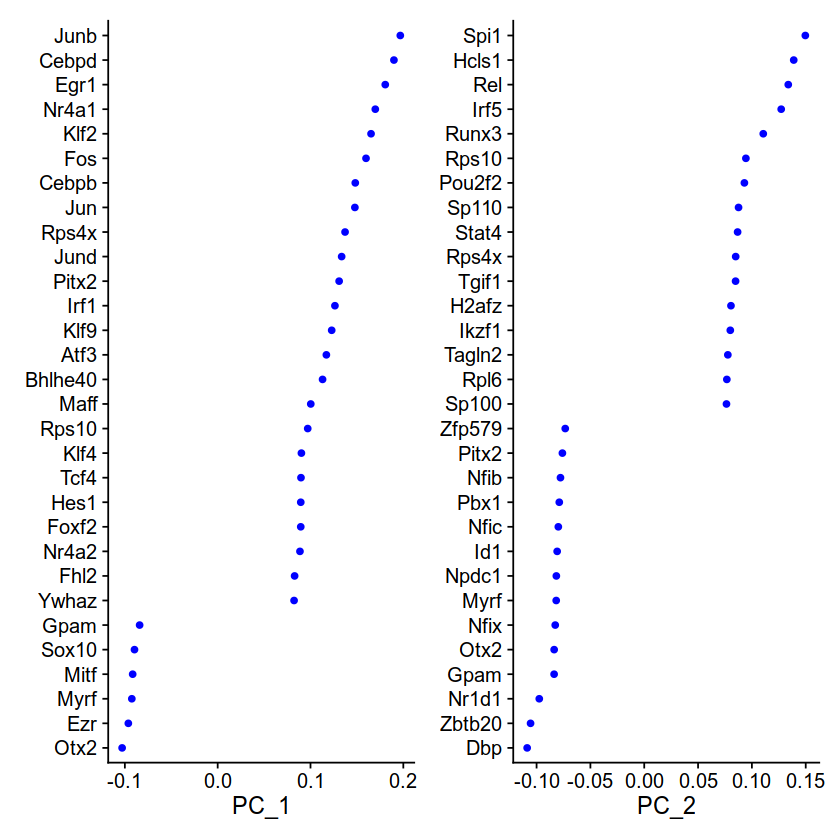

In [37]:
VizDimLoadings(seurat, dims = 1:2, reduction = "pca")

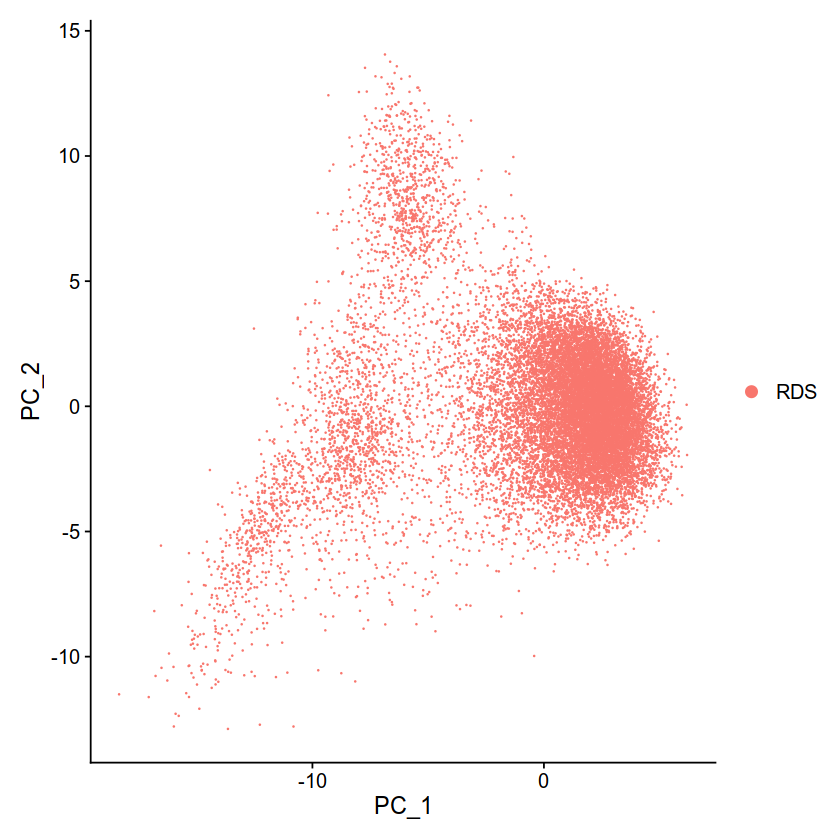

In [38]:
DimPlot(seurat, reduction = "pca")

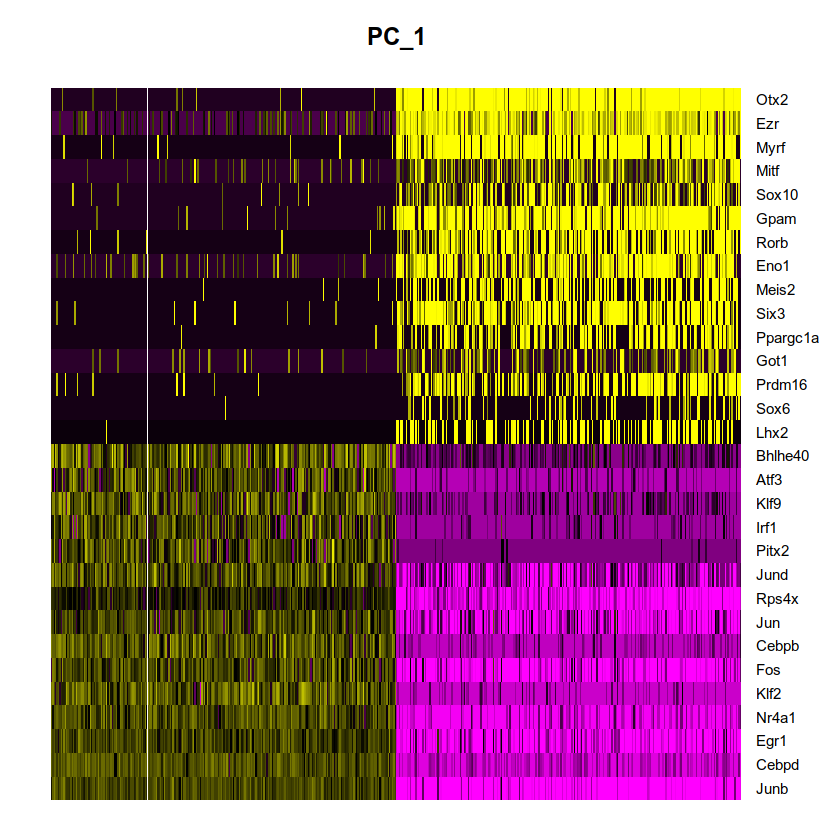

In [39]:
DimHeatmap(seurat, dims = 1, cells = 500, balanced = TRUE)

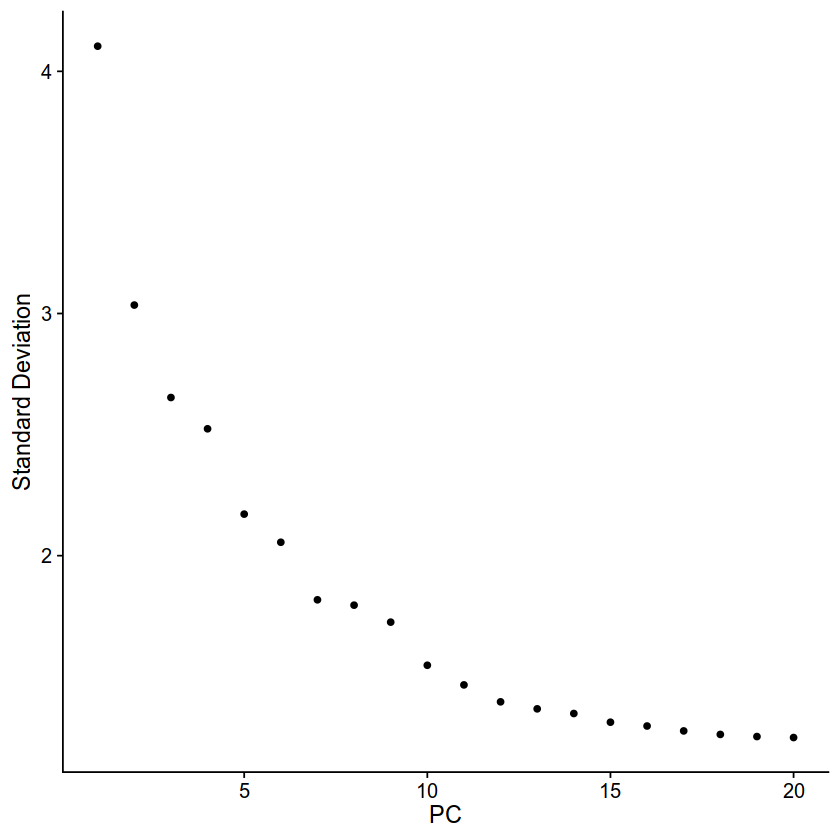

In [40]:
ElbowPlot(seurat)

In [41]:
saveRDS(seurat, file = "~/data//retina/notebook/h5ad/19_10_RPE_Melano_TF_before_neighbours1.rds")


In [42]:
seurat <- FindNeighbors(seurat, dims = 1:10)
seurat <- FindClusters(seurat, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17448
Number of edges: 508809

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8594
Number of communities: 12
Elapsed time: 3 seconds


In [43]:
seurat <- RunUMAP(seurat, dims = 1:10)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
11:25:08 UMAP embedding parameters a = 0.9922 b = 1.112

11:25:08 Read 17448 rows and found 10 numeric columns

11:25:08 Using Annoy for neighbor search, n_neighbors = 30

11:25:08 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:25:10 Writing NN index file to temp file /tmp/RtmpPAzw0H/file143a417395fa

11:25:10 Searching Annoy index using 1 thread, search_k = 3000

11:25:16 Annoy recall = 100%

11:25:17 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

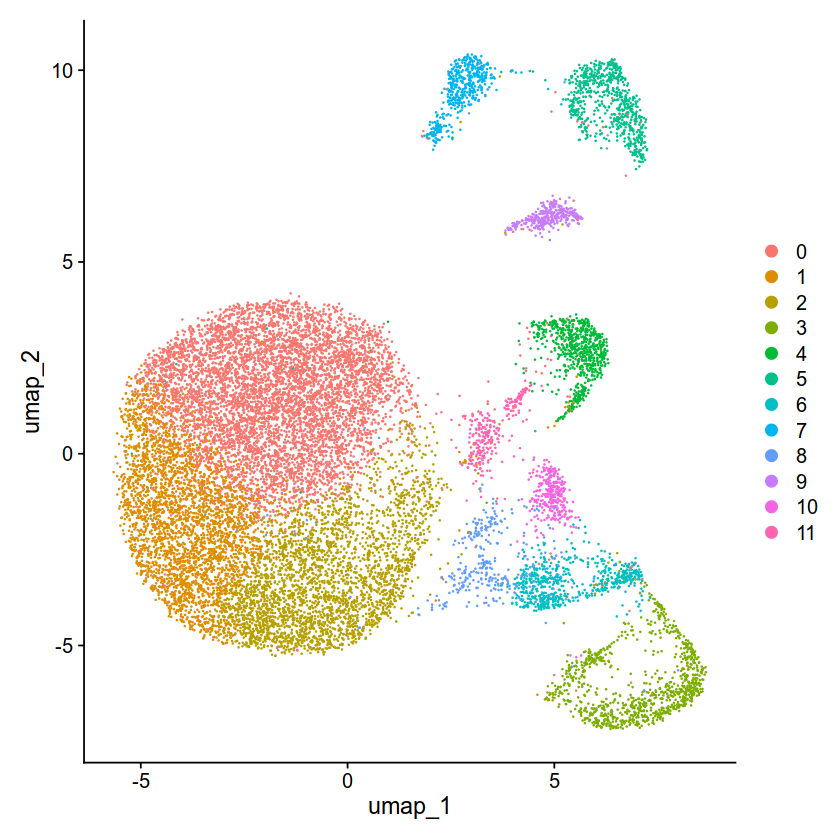

In [44]:
DimPlot(seurat, reduction = "umap")

In [45]:
nExp <- round(ncol(seurat) * 0.07)
seurat <- doubletFinder(seurat, pN = 0.25, pK = 0.09, nExp = nExp, PCs = 1:10)

Loading required package: fields

Loading required package: spam

Spam version 2.10-0 (2023-10-23) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following object is masked from ‘package:Matrix’:

    det


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


Loading required package: viridisLite


Try help(fields) to get started.

Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009



[1] "Creating 5816 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


In [46]:
seurat=seurat[, seurat@meta.data[, 'DF.classifications_0.25_0.09_1221'] == "Singlet"]

In [47]:
saveRDS(seurat, file = "~/data//retina/notebook/h5ad/19_10_RPE_Melano_TF_vithout_doublets1.rds")
#seurat <- readRDS(file = "~/retina/h5ad/1_09_RPE_Melano_markers_genes_no_reclaster_Seurat.rds")

In [8]:
#saveRDS(seurat, file = "~/retina/notebook/h5ad/19_10_RPE_Melano_TF_before_neighbours.rds")
seurat1 <- readRDS(file = "~/data/retina/notebook/h5ad/19_10_RPE_Melano_TF_vithout_doublets.rds")#

In [49]:
seurat <- RunPCA(seurat, npcs = 40)

Warning message:
“The following 161 features requested have zero variance; running reduction without them: Tfap2d, Pou3f3, Lhx9, Lhx4, Tbx19, Nhlh1, Ptf1a, Pax8, Gfi1b, Barhl1, Prdm12, Nr5a1, Hoxd13, Hoxd11, Hoxd9, Hoxd3, Hoxd1, Wt1, Insm1, Nkx2-2, Pax1, Vsx1, Scrt2, Ctcfl, Gm2007, Gm2026, Gm14406, Bhlhe23, Hnf4g, Sohlh2, Nhlh2, Nr1h5, Lhx8, Pou3f2, Arid3c, Dmrtb1, Hmgb4, Lin28a, Pax7, Agmat, Zfp990, Zfp980, Zfp986, Zfp987, Zfp989, Rex2, Zfp978, Zfp985, Zfp534, Hes2, Trp73, Mnx1, Nkx1-1, Hmx1, Barhl2, Foxn4, Hnf1a, Lhx5, Uncx, Gsx1, Pdx1, Cdx2, Dlx6, Fezf1, Nobox, Hoxa1, Hoxa2, Hoxa4, Hoxa5, Hoxa6, Hoxa9, Hoxa10, Hoxa11, Hoxa13, Atoh1, Tlx2, Emx1, Noto, Nanog, Obox1, Obox3, Obox6, Gm4881, Ovol3, Etv2, Gm6871, Bnc1, Hmx3, Nkx1-2, Foxi2, Msx3, Sox1, Nkx6-3, Zfp42, Hand2, Isx, Pou4f2, Zfp872, Skor1, Foxb1, Sox14, Gm4922, Lin28b, Sim1, Rfx6, Neurog3, Myf6, Prop1, Hand1, Foxn1, Hnf1b, Hoxb6, Hoxb5, Hoxb3, Hoxb1, Neurod2, Ferd3l, Foxg1, Insm2, Nkx2-1, Nkx2-9, Six6, Vsx2, Sp8, Pou6f2, Otp, Is

In [50]:
#seurat <- RunPCA(seurat, npcs = 15)
seurat <-FindNeighbors(object = seurat, dims = 1:30)
seurat <-FindClusters(object = seurat, resolution = 2)
seurat <-RunUMAP(object = seurat, dims = 1:18)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 16227
Number of edges: 471177

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7492
Number of communities: 22
Elapsed time: 2 seconds


11:27:57 UMAP embedding parameters a = 0.9922 b = 1.112

11:27:57 Read 16227 rows and found 18 numeric columns

11:27:57 Using Annoy for neighbor search, n_neighbors = 30

11:27:57 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:27:59 Writing NN index file to temp file /tmp/RtmpPAzw0H/file143a529ba2e8

11:27:59 Searching Annoy index using 1 thread, search_k = 3000

11:28:04 Annoy recall = 100%

11:28:04 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

11:28:05 Initializing from normalized Laplacian + noise (using RSpectra)

11:28:06 Commencing optimization for 200 epochs, with 688032 positive edges

11:28:14 Optimization finished



In [51]:
saveRDS(seurat, file = "~/data//retina/notebook/h5ad/19_10_RPE_Melano_TF_umap1.rds")
#seurat <- readRDS(file = "~/retina/h5ad/1_09_RPE_Melano_markers_genes_no_reclaster_Seurat.rds")

In [52]:
seurat1 <- readRDS(file = "~/data//retina/notebook/h5ad/19_10_RPE_Melano_TF_umap1.rds")

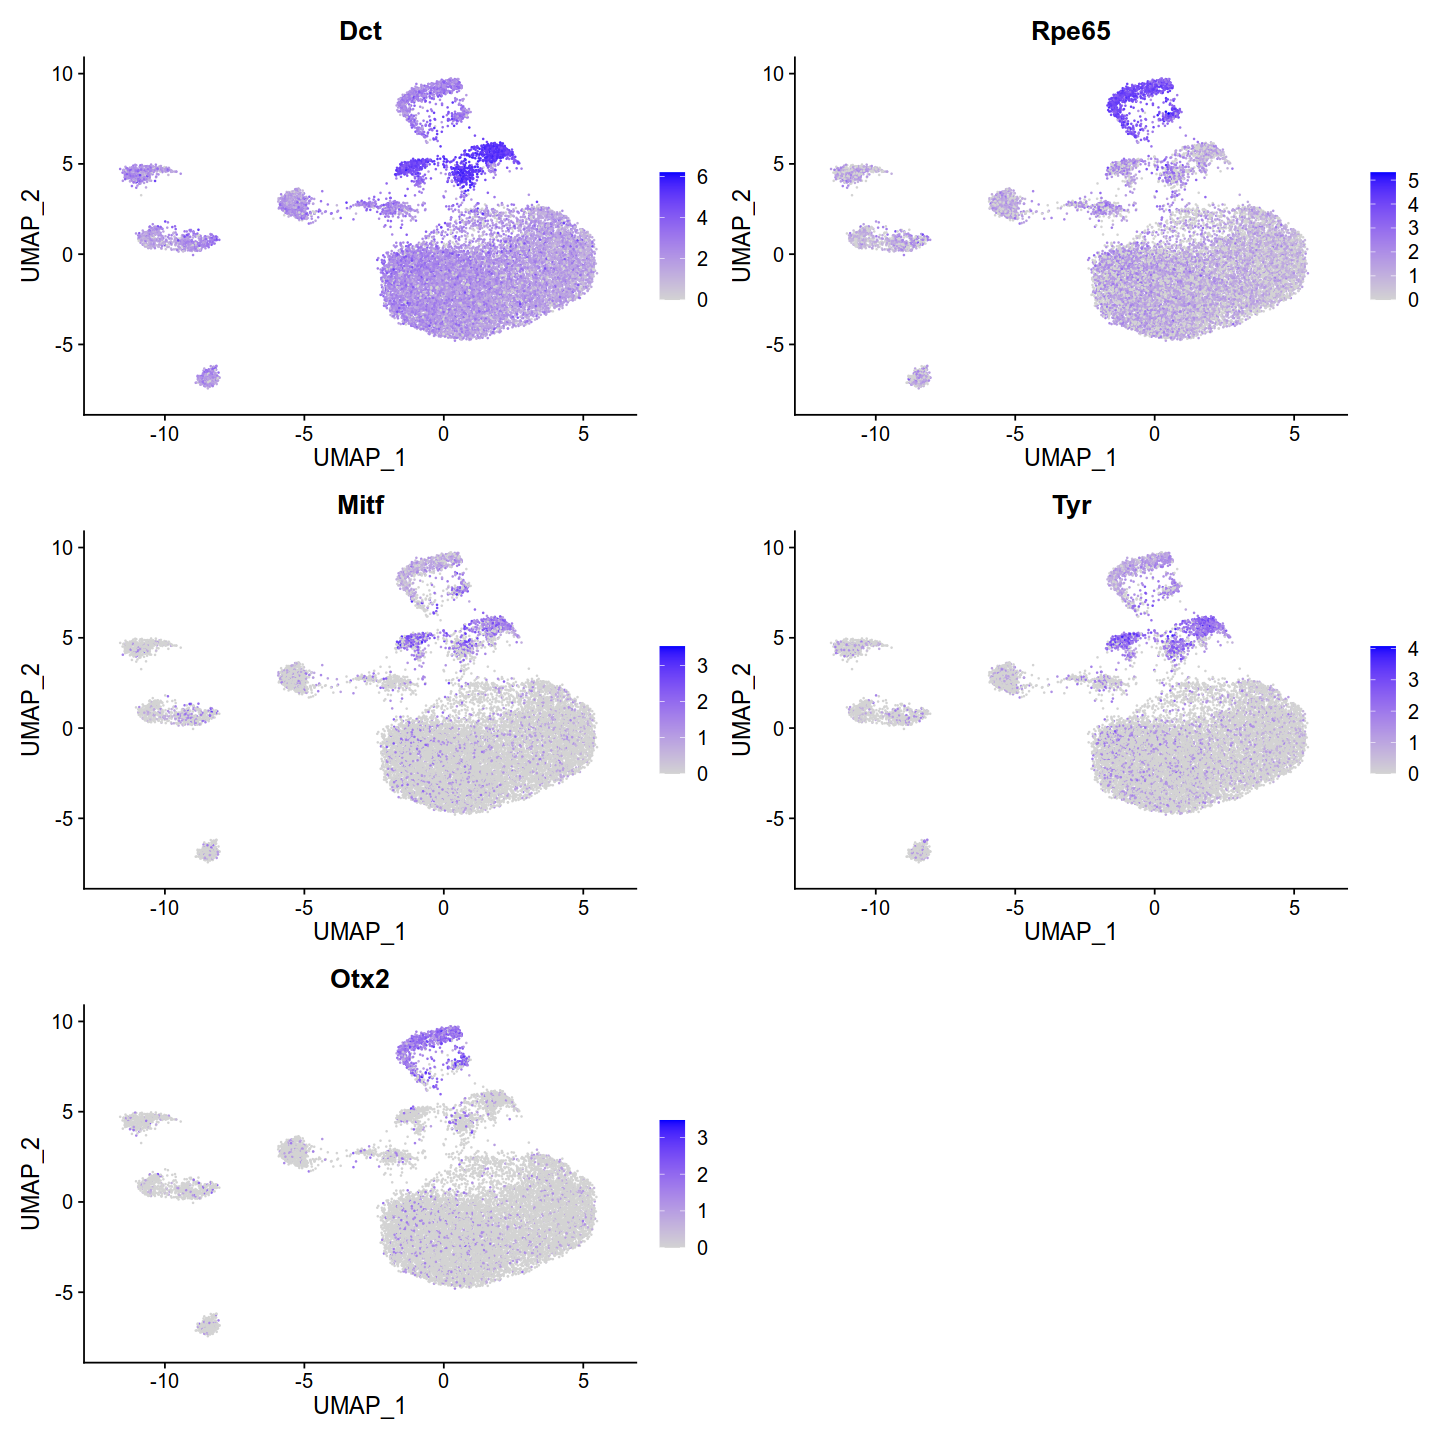

In [53]:

options(repr.plot.width=12, repr.plot.height=12)
FeaturePlot(seurat1, c("Dct","Rpe65","Mitf","Tyr", 'Otx2'), raster.dpi = c(512, 512))

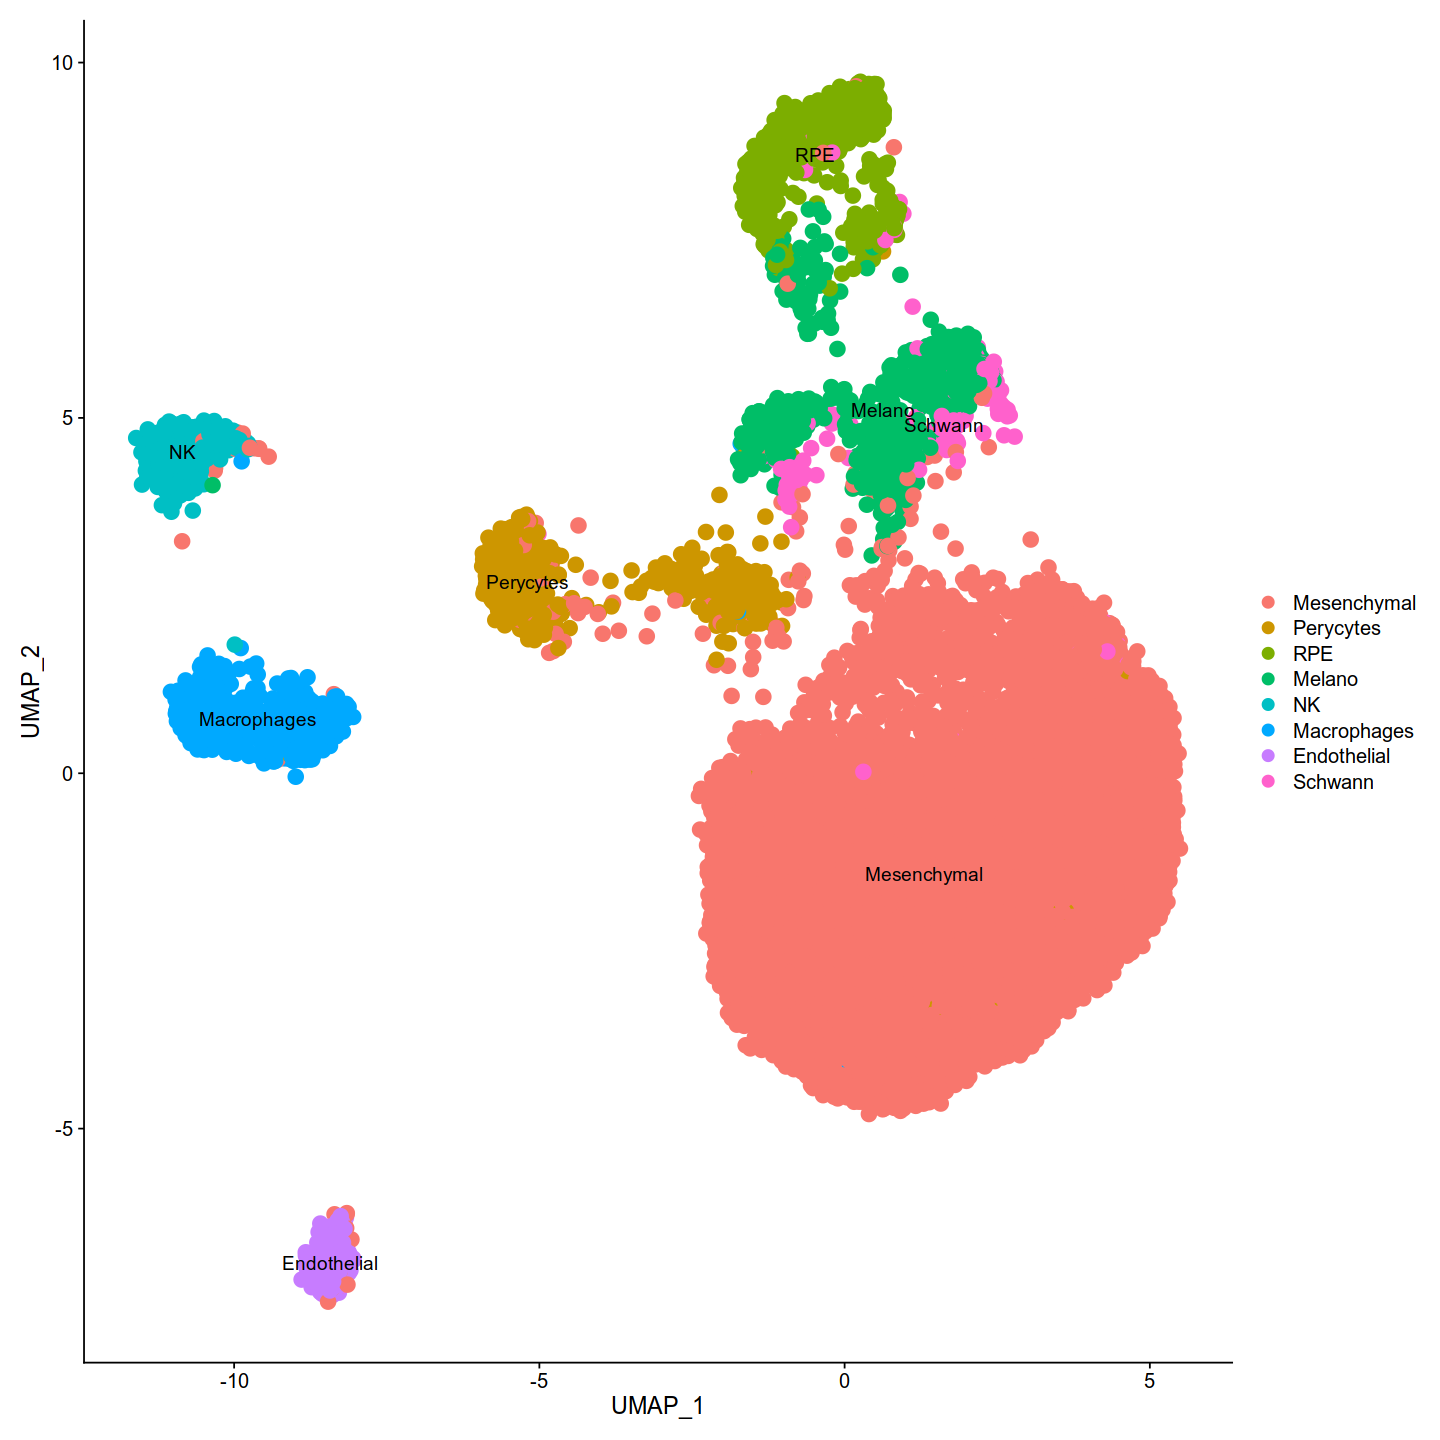

In [56]:
options(repr.plot.width = 12, repr.plot.height =12)
DimPlot(seurat1, reduction = "umap", label = TRUE, pt.size = 4) 

In [55]:
saveRDS(seurat1, file = "~/data//retina/notebook/h5ad/28_10_RPE_Melano_TF_clust_1.rds")